In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print('Shape of training set: {}'.format(train.shape))
print('Shape of test set: {}'.format(test.shape))

Shape of training set: (550068, 12)
Shape of test set: (233599, 11)


In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
## Checking for null values
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

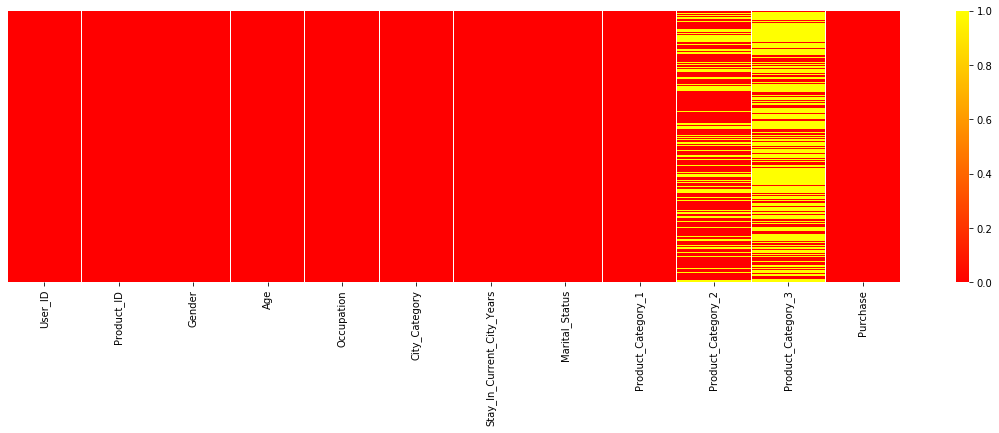

In [8]:
plt.figure(figsize=(20,5))
sns.heatmap(train.isnull(), yticklabels=False, cmap='autumn')

#### Lots of missing values seem to be present in Product_Category_2 and Product_Category_3 features

In [9]:
print('Null values in Test Set: {}'.format(test.isnull().sum()))

Null values in Test Set: User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64


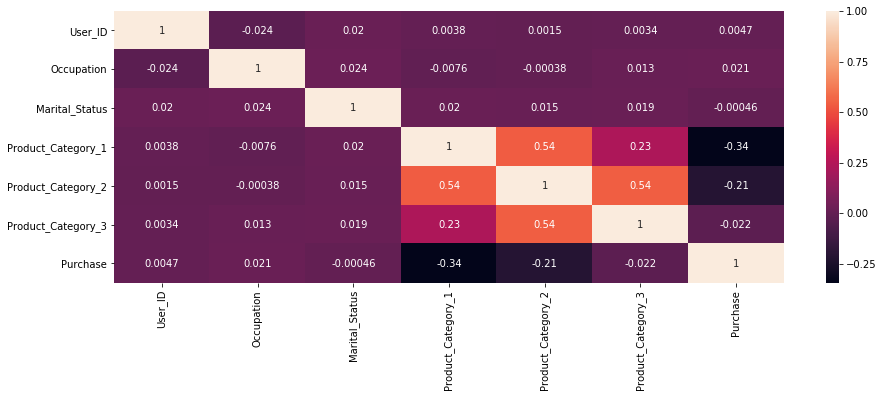

In [10]:
## Checking for feature correlation
plt.figure(figsize=(15,5))
sns.heatmap(train.corr(), annot=True)

In [11]:
train.corr()['Purchase']

User_ID               0.004716
Occupation            0.020833
Marital_Status       -0.000463
Product_Category_1   -0.343703
Product_Category_2   -0.209918
Product_Category_3   -0.022006
Purchase              1.000000
Name: Purchase, dtype: float64

### Statistics for numerical features in the train set 

In [12]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### Statistics for categorical features in the train set 

In [13]:
train.describe(include=['O'])            #To select pandas categorical columns, pass include=['O'] as describe() arg.

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


## Exploratory Data Analysis 

### Feature: Purchase 

In [14]:
train['Purchase'].count()

550068

In [15]:
# Checking maximun range of purchase
train['Purchase'].max()

23961

In [16]:
# Checking minimum range of purchase
train['Purchase'].min()

12

Text(0.5, 1.0, 'Purchase amount Distribution')

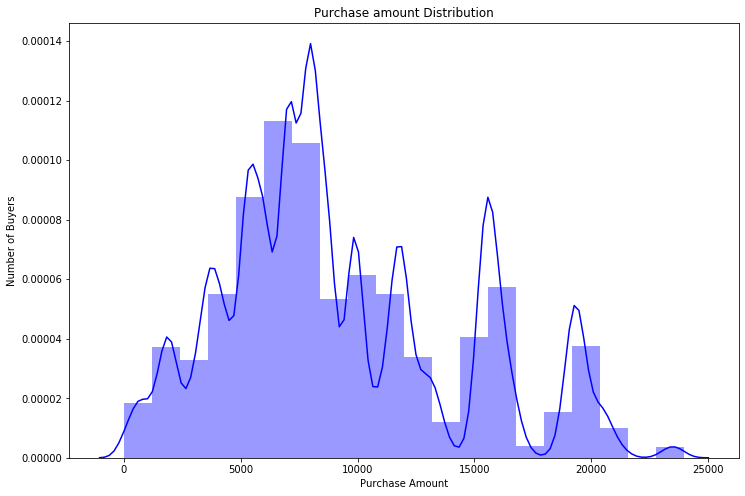

In [17]:
plt.figure(figsize=(12,8))
sns.distplot(train['Purchase'], bins = 20, color='blue')
plt.xlabel("Purchase Amount")
plt.ylabel("Number of Buyers")
plt.title("Purchase amount Distribution")

### Feature: Gender 

In [18]:
train['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [19]:
ge = train['Gender'].value_counts(normalize=True)*100
ge

M    75.310507
F    24.689493
Name: Gender, dtype: float64

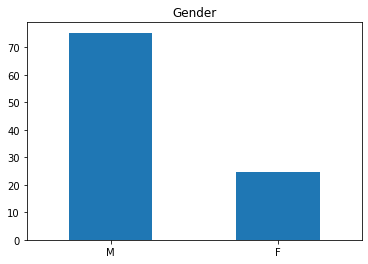

In [20]:
ge.plot.bar(title = 'Gender', rot=0)

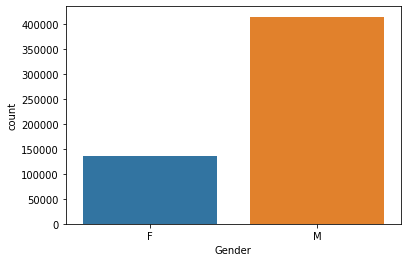

In [21]:
sns.countplot(train['Gender'])

#### Number of male customers are more than that of female 

### Feature: Marital Status 

In [22]:
train['Marital_Status'].value_counts(normalize=True)*100

0    59.034701
1    40.965299
Name: Marital_Status, dtype: float64

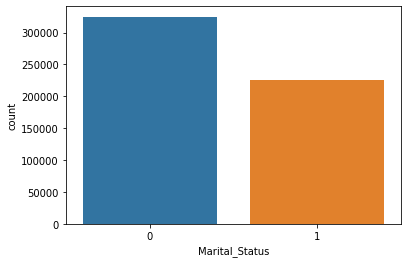

In [23]:
sns.countplot(train['Marital_Status'])

#### More Single people are buying products in the sale than married people.

### Feature: Product_Category_1 	 

In [24]:
train['Product_Category_1'].value_counts(normalize=True)*100

5     27.438971
1     25.520118
8     20.711076
11     4.415272
2      4.338373
6      3.720631
3      3.674637
4      2.136645
16     1.786688
15     1.143495
13     1.008784
10     0.931703
12     0.717548
7      0.676462
18     0.568112
20     0.463579
19     0.291419
14     0.276875
17     0.105078
9      0.074536
Name: Product_Category_1, dtype: float64

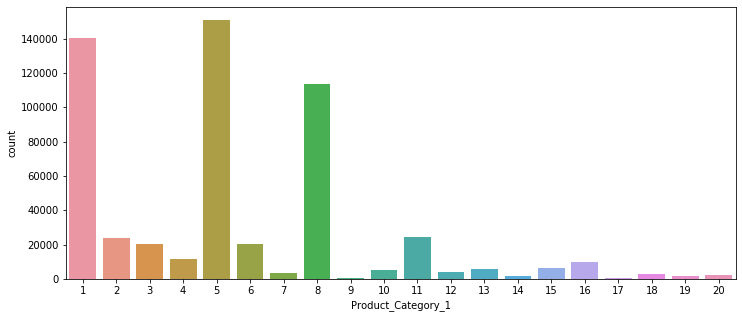

In [25]:
plt.figure(figsize=(12,5))
sns.countplot(train['Product_Category_1'])

#### Products 1, 5 & 8 are highly in demand for Product_Category_1

### Feature: Product_Category_2

In [26]:
train['Product_Category_2'].value_counts(normalize=True)*100

8.0     17.025211
14.0    14.639641
2.0     13.074675
16.0    11.490848
15.0    10.056319
5.0      6.969423
4.0      6.821189
6.0      4.374253
11.0     3.754749
17.0     3.538506
13.0     2.797598
9.0      1.512366
12.0     1.468533
10.0     0.808384
3.0      0.766145
18.0     0.735861
7.0      0.166299
Name: Product_Category_2, dtype: float64

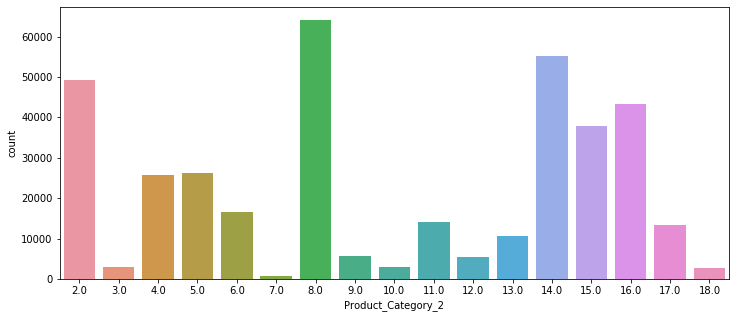

In [27]:
plt.figure(figsize=(12,5))
sns.countplot(train['Product_Category_2'])

#### Products 2, 8, 14 and 16 are highly in demand in Product_Category_2

### Feature: Product_Category_3 

In [28]:
train['Product_Category_3'].value_counts(normalize=True)*100

16.0    19.563484
15.0    16.792250
14.0    11.046571
17.0    10.011929
5.0      9.985553
8.0      7.530227
9.0      6.940973
12.0     5.542468
13.0     3.272370
6.0      2.931286
18.0     2.774831
4.0      1.123959
11.0     1.081998
10.0     1.034642
3.0      0.367460
Name: Product_Category_3, dtype: float64

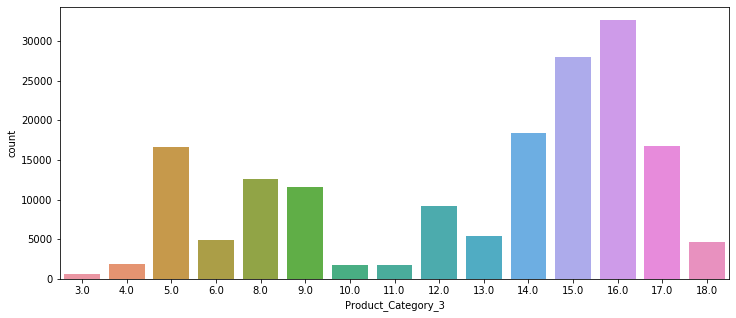

In [29]:
plt.figure(figsize=(12,5))
sns.countplot(train['Product_Category_3'])

#### Products 14, 15, 16 have the maximum demand in Product_Category_3 

### Feature: Occupation 

In [30]:
train['Occupation'].value_counts(normalize=True)*100

4     13.145284
0     12.659889
7     10.750125
1      8.621843
17     7.279645
20     6.101427
12     5.668208
14     4.964659
2      4.833584
16     4.612339
6      3.700452
3      3.208694
10     2.350618
5      2.213726
15     2.211545
11     2.106285
19     1.538173
13     1.404917
18     1.203851
9      1.143677
8      0.281056
Name: Occupation, dtype: float64

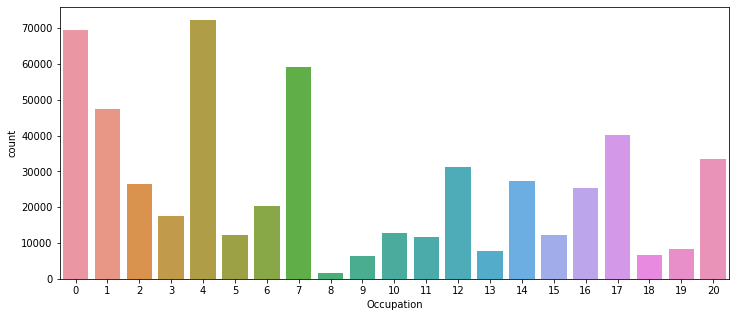

In [31]:
plt.figure(figsize=(12,5))
sns.countplot(train['Occupation'])

### People seem to practise occupation 4, 0, 7 the maximum

### Feature: Age

In [32]:
train['Age'].value_counts(normalize=True)*100

26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64

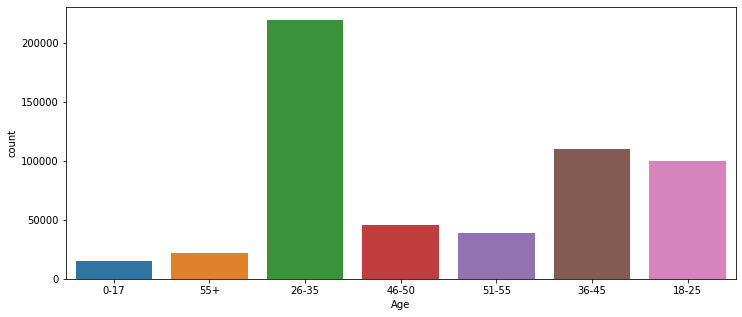

In [33]:
plt.figure(figsize=(12,5))
sns.countplot(train['Age'])

#### People in the age group of 26 - 35 makes the highest purchase, while those in the group 0 - 17 makes the lowest purchase. 

### Feature: City_Category

In [34]:
train['City_Category'].value_counts(normalize=True)*100

B    42.026259
C    31.118880
A    26.854862
Name: City_Category, dtype: float64

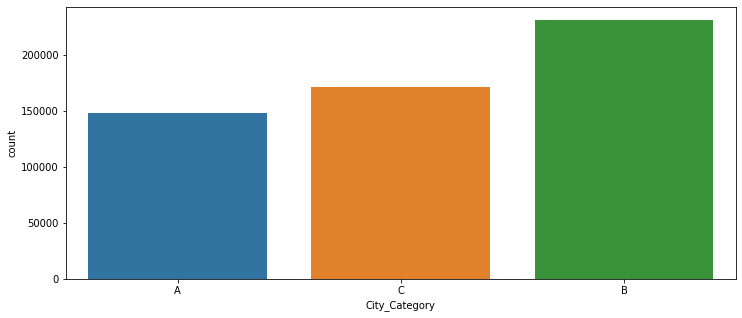

In [35]:
plt.figure(figsize=(12,5))
sns.countplot(train['City_Category'])

#### People in City_Category - 'B' makes the maximum purchases and in category - 'A' the lowest

### Feature: Stay_In_Current_City_Years

In [36]:
train['Stay_In_Current_City_Years'].value_counts(normalize=True)*100

1     35.235825
2     18.513711
3     17.322404
4+    15.402823
0     13.525237
Name: Stay_In_Current_City_Years, dtype: float64

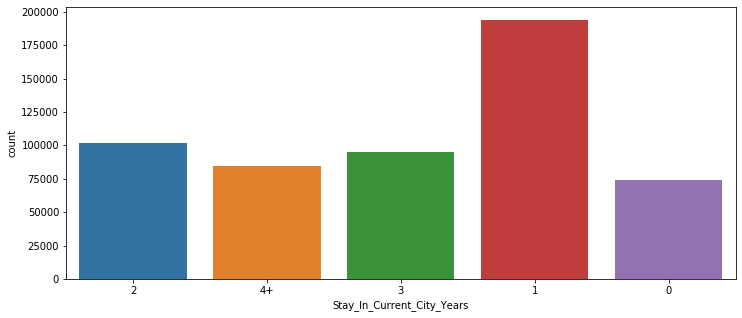

In [37]:
plt.figure(figsize=(12,5))
sns.countplot(train['Stay_In_Current_City_Years'])

#### People staying in the current city for 1 year makes the maximum purchase from the store. 

### Bivariate Analysis 

### Relation between Occupation & Purchase 

In [38]:
# poc = pd.crosstab(train['Occupation'], train['Purchase'])
# poc

poc = train.pivot_table(index='Occupation', values="Purchase", aggfunc=np.sum)
poc

,Purchase
Occupation,
0,635406958
1,424614144
2,238028583
3,162002168
4,666244484
5,113649759
6,188416784
7,557371587
8,14737388


Text(0.5, 1.0, 'Occupation Vs Purchase')

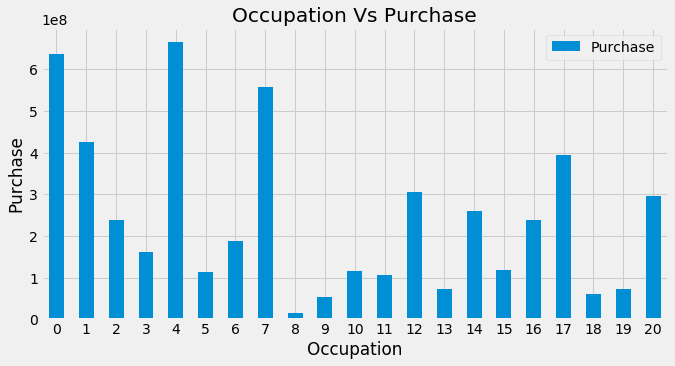

In [39]:
plt.style.use('fivethirtyeight')
poc.plot.bar(figsize=(10,5), rot=0)
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation Vs Purchase")

###  Relation between Marital_Status & Purchase

In [40]:
msc = pd.crosstab(train['Marital_Status'], train['Purchase'])
msc

Purchase,12,13,14,24,25,26,36,37,38,48,...,23951,23952,23953,23954,23955,23956,23958,23959,23960,23961
Marital_Status,,,,,,,,,,,,,,,,,,,,,
0,57,63,53,78,69,59,64,67,65,62,...,0,1,1,1,2,1,2,1,1,2
1,44,43,42,40,44,53,43,43,49,46,...,1,0,1,1,1,0,2,1,3,1


In [41]:
# All the Purchase have to be aggregated, so pivot table is used with aggfunc = np.sum.
mspt = train.pivot_table(index='Marital_Status', values='Purchase', aggfunc=np.sum)
mspt

,Purchase
Marital_Status,
0,3008927447
1,2086885295


Text(0.5, 1.0, 'Marital_Status Vs Purchase')

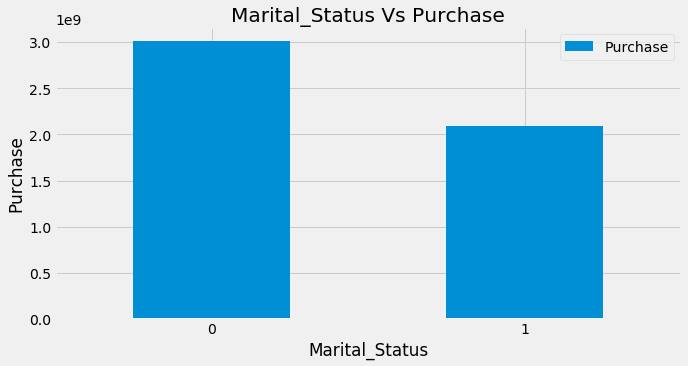

In [42]:
plt.style.use('fivethirtyeight')
mspt.plot.bar(figsize=(10,5), rot=0)
plt.xlabel("Marital_Status")
plt.ylabel("Purchase")
plt.title("Marital_Status Vs Purchase")

###  Relation between Product_Category_1 & Purchase

In [43]:
pc1p = train.pivot_table(index='Product_Category_1', values = 'Purchase', aggfunc=np.sum)
pc1p

,Purchase
Product_Category_1,
1,1910013754
2,268516186
3,204084713
4,27380488
5,941835229
6,324150302
7,60896731
8,854318799
9,6370324


Text(0.5, 1.0, 'Product_Category_1 Vs Purchase')

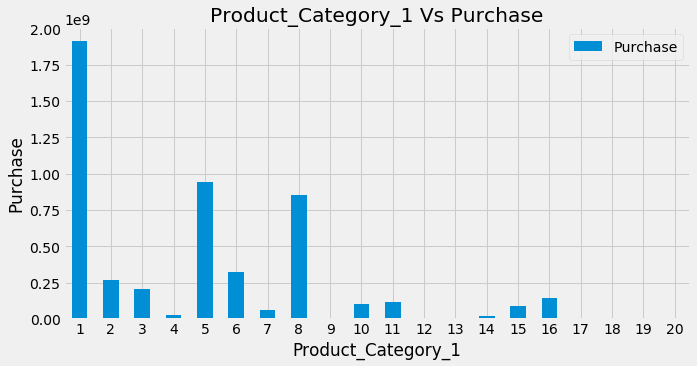

In [44]:
plt.style.use('fivethirtyeight')
pc1p.plot.bar(figsize=(10,5), rot=0)
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1 Vs Purchase")

###  Relation between Product_Category_2 & Purchase 

In [45]:
pc2p = train.pivot_table(index='Product_Category_2', values = 'Purchase', aggfunc=np.sum)
pc2p

,Purchase
Product_Category_2,
2.0,670303864
3.0,32402777
4.0,262295485
5.0,236844899
6.0,189417477
7.0,4309812
8.0,658392656
9.0,41428000
10.0,47619084


Text(0.5, 1.0, 'Product_Category_2 Vs Purchase')

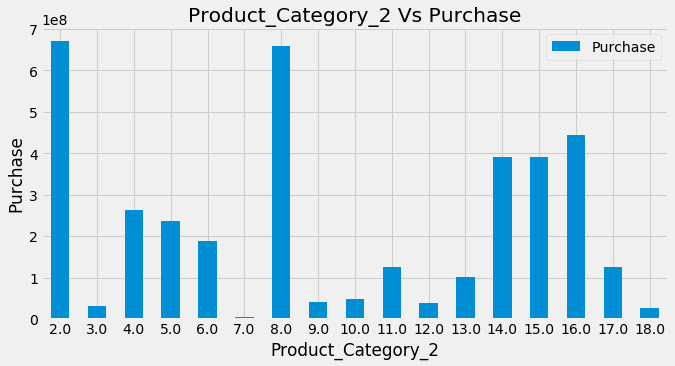

In [46]:
plt.style.use('fivethirtyeight')
pc2p.plot.bar(figsize=(10,5), rot=0)
plt.xlabel("Product_Category_2")
plt.ylabel('Purchase')
plt.title("Product_Category_2 Vs Purchase")


###  Relation between Product_Category_3 & Purchase 

In [47]:
pc3p = train.pivot_table(index='Product_Category_3', values = 'Purchase', aggfunc=np.sum)
pc3p

,Purchase
Product_Category_3,
3.0,8545034
4.0,18364475
5.0,201858094
6.0,64520181
8.0,163619031
9.0,120788622
10.0,23311034
11.0,21825045
12.0,80583631


Text(0.5, 1.0, 'Product_Category_3 Vs Purchase')

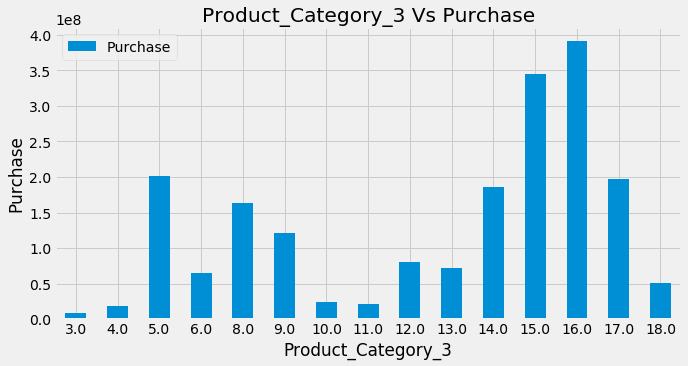

In [48]:
plt.style.use('fivethirtyeight')
pc3p.plot.bar(figsize=(10,5), rot=0)
plt.xlabel("Product_Category_3")
plt.ylabel("Purchase")
plt.title("Product_Category_3 Vs Purchase")


### Relation between Gender & Purchase

In [49]:
genp = train.pivot_table(index='Gender', values='Purchase', aggfunc=np.sum)
genp

,Purchase
Gender,
F,1186232642
M,3909580100


Text(0.5, 1.0, 'Gender Vs Purchase')

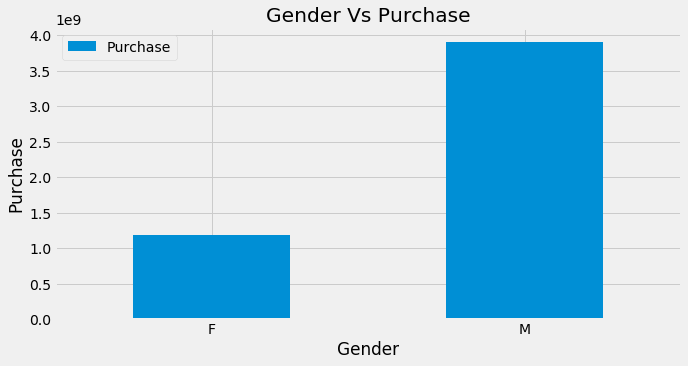

In [50]:
plt.style.use('fivethirtyeight')
genp.plot.bar(figsize=(10,5), rot=0)
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.title("Gender Vs Purchase")


#### Here Males are purchaseing more than females 

### Relation between Age & Purchase 

In [51]:
agp = train.pivot_table(index='Age', values='Purchase', aggfunc=np.sum)
agp

,Purchase
Age,
0-17,134913183
18-25,913848675
26-35,2031770578
36-45,1026569884
46-50,420843403
51-55,367099644
55+,200767375


Text(0.5, 1.0, 'Age Vs Purchase')

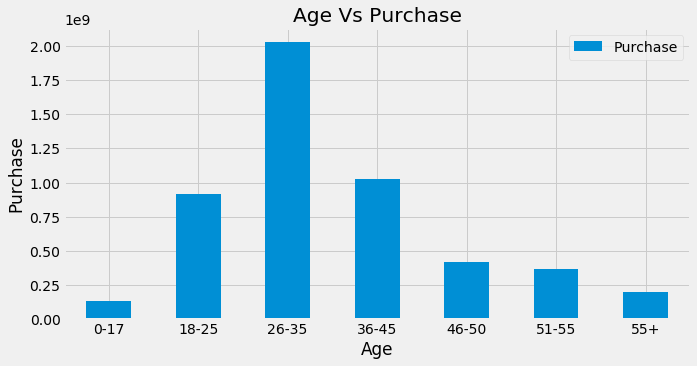

In [52]:
plt.style.use('fivethirtyeight')
agp.plot.bar(figsize=(10,5), rot=0)
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age Vs Purchase")

### Relation between City_Category & Purchase  

In [53]:
ccp = train.pivot_table(index='City_Category', values='Purchase', aggfunc=np.sum)
ccp

,Purchase
City_Category,
A,1316471661
B,2115533605
C,1663807476


Text(0.5, 1.0, 'City_Category Vs Purchase')

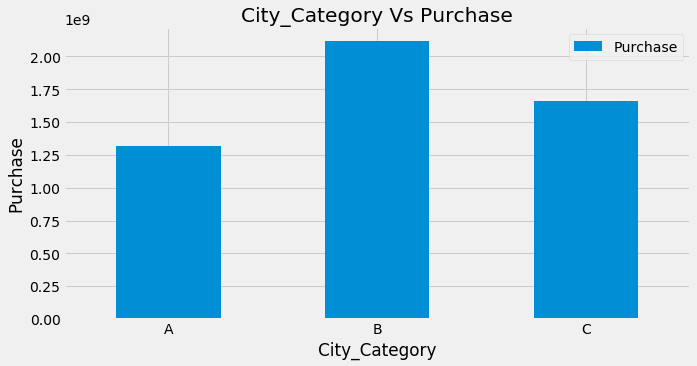

In [54]:
#plt.style.use('whitegrid')
ccp.plot.bar(figsize=(10,5), rot=0)
plt.xlabel("City_Category")
plt.ylabel("Purchase")
plt.title("City_Category Vs Purchase")


### Relation between Stay_In_Current_City_Years & Purchase

In [55]:
sccp = train.pivot_table(index='Stay_In_Current_City_Years', values='Purchase', aggfunc=np.sum)
sccp

,Purchase
Stay_In_Current_City_Years,
0,682979229
1,1792872533
2,949173931
3,884902659
4+,785884390


Text(0.5, 1.0, 'Stay_In_Current_City_Years Vs Purchase')

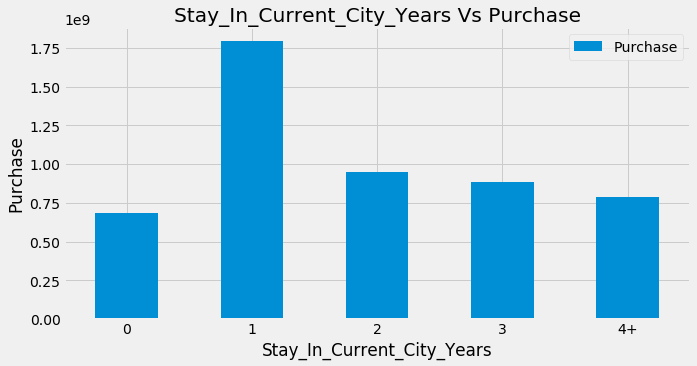

In [56]:
sccp.plot.bar(figsize=(10,5), rot=0)
plt.xlabel("Stay_In_Current_City_Years")
plt.ylabel("Purchase")
plt.title("Stay_In_Current_City_Years Vs Purchase")


## Data Preparation 

### Handling Null Values

In [57]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [58]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [59]:
train['Product_Category_2'].mode()[0]

8.0

In [60]:
train['Product_Category_2'].fillna(train['Product_Category_2'].mode()[0], inplace=True)
test['Product_Category_2'].fillna(test['Product_Category_2'].mode()[0], inplace=True)

In [61]:
train['Product_Category_3'].mode()[0]

16.0

In [62]:
train['Product_Category_3'].fillna(train['Product_Category_3'].mode()[0], inplace=True)
test['Product_Category_3'].fillna(test['Product_Category_3'].mode()[0], inplace=True)

In [63]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [64]:
test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

#### No Null values present in the Train and Test set

## Feature Engineering 

In [65]:
train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


### Converting Gender to binary 

In [66]:
gb = {'M':1, 'F':0}
train['Gender'] = train['Gender'].map(gb)
test['Gender'] = test['Gender'].map(gb)

### Converting Age to numeric values

In [67]:
train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [68]:
age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}

train['Age'] = train['Age'].map(age_dict)
test['Age'] = test['Age'].map(age_dict)

In [69]:
train['Age'].value_counts()

2    219587
3    110013
1     99660
4     45701
5     38501
6     21504
0     15102
Name: Age, dtype: int64

### Converting City_Category to binary 

In [70]:
train['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [71]:
c_dict = {'A':0, 'B':1, 'C':2}

train['City_Category'] = train['City_Category'].map(c_dict)
test['City_Category'] = test['City_Category'].map(c_dict)

### Stay_In_Current_City_Years

In [72]:
train['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [73]:
train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,8.0,16.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200


In [74]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [75]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train['Stay_In_Current_City_Years'] = le.fit_transform(train['Stay_In_Current_City_Years'])
test['Stay_In_Current_City_Years'] = le.transform(test['Stay_In_Current_City_Years'])

In [76]:
#Dummy Variables:
train = pd.get_dummies(train, columns=['Stay_In_Current_City_Years'])
test = pd.get_dummies(test, columns=['Stay_In_Current_City_Years'])

In [77]:
train.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,1000001,P00069042,0,0,10,0,0,3,8.0,16.0,8370,0,0,1,0,0
1,1000001,P00248942,0,0,10,0,0,1,6.0,14.0,15200,0,0,1,0,0
2,1000001,P00087842,0,0,10,0,0,12,8.0,16.0,1422,0,0,1,0,0


In [78]:
test.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,1000004,P00128942,1,4,7,1,1,1,11.0,16.0,0,0,1,0,0
1,1000009,P00113442,1,2,17,2,0,3,5.0,16.0,1,0,0,0,0
2,1000010,P00288442,0,3,1,1,1,5,14.0,16.0,0,0,0,0,1


## Model Building 

In [79]:
X_train = train.drop(['User_ID', 'Product_ID', 'Purchase'], axis = 1)
y_train = train['Purchase']

In [80]:
X_train.head(2)

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,0,0,10,0,0,3,8.0,16.0,0,0,1,0,0
1,0,0,10,0,0,1,6.0,14.0,0,0,1,0,0


In [81]:
y_train.head(2)

0     8370
1    15200
Name: Purchase, dtype: int64

In [82]:
y_train.shape

(550068,)

In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

### Linear Regression

In [84]:
linreg = LinearRegression(normalize=True)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [85]:
mse = mean_squared_error(y_train, linreg.predict(X_train))
rmse = np.sqrt(mse)
rmse

4682.611869386286

In [86]:
#CROSS VALIDATION

cross_mse = cross_val_score(linreg, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
cross_rmse = np.sqrt(np.absolute(cross_mse))
avg_cross_rmse = np.mean(cross_rmse)
avg_cross_rmse

4685.471399579095

### SVR 

In [87]:
svr = LinearSVR()

In [88]:
svr.fit(X_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [89]:
mse = mean_squared_error(y_train, svr.predict(X_train))
rmse = np.sqrt(mse)
rmse

4776.096890592431

In [90]:
#CROSS VALIDATION

cross_mse = cross_val_score(svr, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
cross_rmse = np.sqrt(np.absolute(cross_mse))
avg_cross_rmse = np.mean(cross_rmse)
avg_cross_rmse

4788.887726152917

### RandomForestRegressor

In [91]:
rf = RandomForestRegressor(max_depth=15, min_samples_leaf=100, n_jobs=-1)
rf.fit(X_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=100, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [92]:
mse = mean_squared_error(y_train, rf.predict(X_train))
rmse = np.sqrt(mse)
rmse

2905.6747322422857

In [93]:
#CROSS VALIDATION

cross_mse = cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
cross_rmse = np.sqrt(np.absolute(cross_mse))
avg_cross_rmse = np.mean(cross_rmse)
avg_cross_rmse

2939.855936181524

### KNeighborsRegressor

In [94]:
knn = KNeighborsRegressor(n_neighbors=10, n_jobs=-1)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                    weights='uniform')

In [95]:
mse = mean_squared_error(y_train, knn.predict(X_train))
rmse = np.sqrt(mse)
rmse

2886.604689637673

In [96]:
#CROSS VALIDATION

cross_mse = cross_val_score(knn, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
cross_rmse = np.sqrt(np.absolute(cross_mse))
avg_cross_rmse = np.mean(cross_rmse)
avg_cross_rmse

3158.891995993817

### Decision Tree

In [97]:
dtree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=100,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [98]:
mse = mean_squared_error(y_train, dtree.predict(X_train))
rmse = np.sqrt(mse)
rmse

2911.078149491977

In [99]:
#CROSS VALIDATION

cross_mse = cross_val_score(dtree, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
cross_rmse = np.sqrt(np.absolute(cross_mse))
avg_cross_rmse = np.mean(cross_rmse)
avg_cross_rmse

2950.5904059918175

### Random Forest Regressor is chosen.

In [100]:
test.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,1000004,P00128942,1,4,7,1,1,1,11.0,16.0,0,0,1,0,0


In [101]:
#target = 'Purchase'
IDcol1 = test['User_ID']
IDcol2 = test['Product_ID']

In [102]:
X_test = test.drop(['User_ID', 'Product_ID'], axis = 1)
X_test.shape

(233599, 13)

In [103]:
fin_pred = rf.predict(X_test)

In [104]:
submission = pd.DataFrame({
        "User_ID": IDcol1,
        'Product_ID': IDcol2,
        "Purchase": fin_pred
    })

submission.head(10)

,User_ID,Product_ID,Purchase
0,1000004,P00128942,13837.801557
1,1000009,P00113442,10957.360530
2,1000010,P00288442,6353.098379
3,1000010,P00145342,2642.524266
4,1000011,P00053842,2742.719082
5,1000013,P00350442,11802.933801
6,1000013,P00155442,13232.383845
7,1000013,P0094542,11153.440664
8,1000015,P00161842,18774.557111
9,1000022,P00067942,5955.134840


In [105]:
submission.shape

(233599, 3)